# About Series

* Series란?<br>
    Data의 컬럼이 1개인 자료구조이며, 인덱스와 1개의 열로 구성되어 있음

## Series 만드는 방법

* pd.Series()에 DataType이 1. 리스트 혹은 2.딕셔너리 로 만들 수 있음<br>

* 딕셔너리의 경우 index와 value가 같이 만들어지며, 리스트의 경우 value만 지정

In [1]:
# 판다스 라이브러리(패키지) 불러오기
import pandas as pd

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_1997/3952730005.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Data Type이 '리스트'인 경우

ls1 = [1,2,3,4,5,6,7,8,9]

ls2 = [1,2,3,'Apple','play',6,7,8,9]

sr1 = pd.Series(ls1)
sr1

sr2 = pd.Series(ls2)
sr2

0        1
1        2
2        3
3    Apple
4     play
5        6
6        7
7        8
8        9
dtype: object

In [3]:
# Series에 Name설정
sr1.name = "Number"
sr2.name = "Word"
sr2

0        1
1        2
2        3
3    Apple
4     play
5        6
6        7
7        8
8        9
Name: Word, dtype: object

In [7]:
# Data Type이 '딕셔너리'인 경우
dic1 = {"a":1, 'b':2, "c":3, "d":4}

sr3 = pd.Series(dic1)
sr3
sr3.name = "Number"
sr3


a    1
b    2
c    3
d    4
Name: Number, dtype: int64

## 삼성전자 종가 Series로 불러오기

* path<br>
* index_col<br>
* header<br>
* squeeze

In [8]:
import pandas as pd

path = '/Users/hj/Documents/무제/finance data/Data/삼성전자 종가.csv'

df = pd.read_csv(path, index_col = 0, header = 0)

a = df.squeeze()

a

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

## Series Index & Value

In [10]:
import pandas as pd

samsung_price = a
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [11]:
# samsung_price의 index만 따로 추출
samsung_price.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-15',
       ...
       '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
       '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17'],
      dtype='object', name='Date', length=977)

In [18]:
# '2020-12-15 Data가 있을까?'

samsung_price.loc['2020-12-15']

date = '2022-12-15'
if date in samsung_price.index:
    data = samsung_price.loc['2022-12-15']
    print(data)
else:
    print("찾는 값이 없습니다.")

찾는 값이 없습니다.


In [13]:
# 100번째 Dataq값은?

samsung_price.iloc[100]

49500

## Series에 새로운 행을 추가하고 싶을때?

In [18]:
# import pandas as pd

# samsung_price = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)
# samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [26]:
# samsung_price에 총 길이는?
# samsung_price.index[samsung_price.shape[0]-1]
samsung_price.shape

(977,)

In [27]:
# samsung_price에 '2021-12-19'주가를 추가하고 싶다면?
samsung_price.loc['2021-12-20'] = 77100
samsung_price
samsung_price.loc['2021-12-16'] = 0
samsung_price

# 새로운 값을 추가하거나 덮어씌울때 loc 쓰자!! 

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-14    77000
2021-12-15    77600
2021-12-16        0
2021-12-17    78000
2021-12-20    77100
Name: Close, Length: 978, dtype: int64

In [27]:
samsung_price.describe()

count      978.000000
mean     57236.554192
std      14194.895001
min          0.000000
25%      46262.500000
50%      51300.000000
75%      70200.000000
max      91000.000000
Name: Close, dtype: float64

## 두개의 Series 연결

In [34]:
import pandas as pd
#pd.set_option('display.max_rows', None)

series1_samsung = pd.read_excel('/Users/hj/Documents/무제/finance data/Data/samsung_excel.xlsx', sheet_name = 'Sheet1', index_col = 0)
series1_samsung= series1_samsung.squeeze()

series2_samsung = pd.read_excel('/Users/hj/Documents/무제/finance data/Data/samsung_excel.xlsx', sheet_name = 'Sheet2', index_col = 0)
series2_samsung = series2_samsung.squeeze()

series_samsung = pd.concat([series1_samsung, series2_samsung], ignore_index = False)
series_samsung

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-20    77100
2021-12-21    78100
2021-12-22    79400
2021-12-23    79900
2021-12-24    80500
Name: Close, Length: 982, dtype: int64

## Series 기본 통계치 구하기

In [36]:
# import pandas as pd

# samsung_price = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)
# samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [36]:
# 삼성전자 고점? 저점?

samsung_price.max()
samsung_price.min()

samsung_price.describe()

count      978.000000
mean     57236.554192
std      14194.895001
min          0.000000
25%      46262.500000
50%      51300.000000
75%      70200.000000
max      91000.000000
Name: Close, dtype: float64

In [44]:
# samsung_price.index[samsung_price.values == samsung_price.max()]
samsung_price.index[samsung_price.values == samsung_price.min()]

sum(samsung_price.values == samsung_price.min())

1

In [46]:
samsung_price.argmin()  # min의 인덱스값

975

In [51]:
# samsung_price.iloc[samsung_price.argmin()]
samsung_price.index[samsung_price.argmin()]
# samsung_price.iloc[samsung_price.argmax()]
# samsung_price.index[samsung_price.argmax()]

'2021-12-16'

In [53]:
samsung_price.loc['2021-12-16'] = 37450
samsung_price.argmin()

246

In [54]:
samsung_price.describe()

count      978.000000
mean     57274.846626
std      14090.463271
min      37450.000000
25%      46262.500000
50%      51300.000000
75%      70200.000000
max      91000.000000
Name: Close, dtype: float64

## Series 연산
* 삼성전자 수익률 구하기

In [40]:
import pandas as pd

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [41]:
samsung_price.shift(1)

Date
2018-01-02        NaN
2018-01-03    51020.0
2018-01-04    51620.0
2018-01-05    51080.0
2018-01-08    52120.0
               ...   
2021-12-13    76900.0
2021-12-14    76800.0
2021-12-15    77000.0
2021-12-16    77600.0
2021-12-17    77800.0
Name: Close, Length: 977, dtype: float64

In [42]:
samsung_price - samsung_price.shift(1)

Date
2018-01-02       NaN
2018-01-03     600.0
2018-01-04    -540.0
2018-01-05    1040.0
2018-01-08    -100.0
               ...  
2021-12-13    -100.0
2021-12-14     200.0
2021-12-15     600.0
2021-12-16     200.0
2021-12-17     200.0
Name: Close, Length: 977, dtype: float64

In [43]:
samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [44]:
samsung_price.pct_change()

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [45]:
samsung_return.max()

0.10470588235294118

In [46]:
samsung_return.index[samsung_return.argmax()]

'2020-03-24'

## Nan값

In [48]:
import pandas as pd

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)
samsung_price
samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [49]:
samsung_return.dropna()

Date
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
2018-01-09   -0.031142
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 976, dtype: float64

In [50]:
samsung_return.fillna(0)

Date
2018-01-02    0.000000
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

## 순서대로 정렬

In [51]:
import pandas as pd

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)
samsung_price
samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [52]:
# index순서대로 정렬
samsung_price.sort_index(ascending = True)

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [53]:
# value순서대로 정렬
samsung_price.sort_values(ascending = True).head(30)

Date
2019-01-04    37450
2019-01-03    37600
2019-01-08    38100
2018-12-27    38250
2018-12-26    38350
              ...  
2018-10-25    41000
2018-10-26    41000
2019-01-15    41100
2019-05-17    41200
2018-10-29    41400
Name: Close, Length: 30, dtype: int64

## Series 조건설정

In [54]:
import pandas as pd
import numpy as np

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)
samsung_price
samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return = samsung_return * 100
samsung_return

Date
2018-01-02         NaN
2018-01-03    1.176009
2018-01-04   -1.046106
2018-01-05    2.036022
2018-01-08   -0.191865
                ...   
2021-12-13   -0.130039
2021-12-14    0.260417
2021-12-15    0.779221
2021-12-16    0.257732
2021-12-17    0.257069
Name: Close, Length: 977, dtype: float64

In [55]:
samsung_return[samsung_return.values >= 4]

Date
2018-03-06     4.026549
2018-09-14     4.086266
2018-11-02     4.744958
2019-03-21     4.086266
2020-03-20     5.704307
2020-03-24    10.470588
2020-04-17     4.897959
2020-06-03     6.031128
2020-06-16     4.408818
2020-07-28     5.395683
2020-11-16     4.905063
2020-11-23     4.327666
2020-12-24     5.277402
2021-01-08     7.117008
2021-02-25     4.024390
2021-11-22     5.196629
2021-12-01     4.347826
Name: Close, dtype: float64

In [56]:
np.where(samsung_return.values >= 4, 1, 0)

samsung_return_over_4 = pd.Series(np.where(samsung_return.values >= 4, "Over 4%", "Under"))
samsung_return_over_4.index = samsung_return.index
samsung_return_over_4.loc['2020-06-16']

'Over 4%'

## Series값의 구간을 나눠보자


In [57]:
import pandas as pd
import numpy as np

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)
samsung_price
samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [58]:
# pd.cut()
pd.cut(samsung_return, bins=10)
pd.cut(samsung_return, bins=10).value_counts()

(-0.0133, 0.00356]    414
(0.00356, 0.0204]     298
(-0.0302, -0.0133]    137
(0.0204, 0.0373]       70
(-0.047, -0.0302]      31
(0.0373, 0.0541]       19
(-0.064, -0.047]        3
(0.0541, 0.071]         2
(0.071, 0.0878]         1
(0.0878, 0.105]         1
Name: Close, dtype: int64

In [59]:
#pd.qcut()
pd.qcut(samsung_return, 10)
pd.qcut(samsung_return, 10).value_counts()

(-0.00332, 0.0]         108
(-0.0649, -0.0194]       98
(-0.0194, -0.0116]       98
(-0.00702, -0.00332]     98
(0.00753, 0.0122]        98
(0.02, 0.105]            98
(-0.0116, -0.00702]      97
(0.00358, 0.00753]       97
(0.0122, 0.02]           97
(0.0, 0.00358]           87
Name: Close, dtype: int64

## Series rolling

In [60]:
import pandas as pd
import numpy as np

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)
samsung_price
samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return = samsung_return * 100
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

<AxesSubplot:xlabel='Date'>

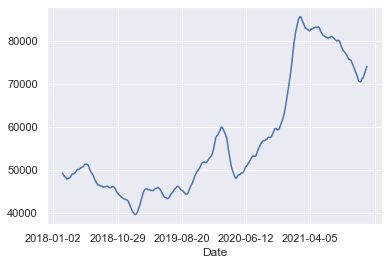

In [61]:
samsung_price.rolling(window = 30).mean().plot()

## 크기가 다른 두 Series

In [63]:
import pandas as pd
import numpy as np

samsung = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)
samsung

kospi = pd.read_csv("KOSPI.csv", index_col = 0, squeeze = True, header = 0)
kospi

Date
2020-01-02    2175.17
2020-01-03    2176.46
2020-01-06    2155.07
2020-01-07    2175.54
2020-01-08    2151.31
               ...   
2021-12-13    3001.66
2021-12-14    2987.95
2021-12-15    2989.39
2021-12-16    3006.41
2021-12-17    3017.73
Name: Close, Length: 477, dtype: float64

In [64]:
#print(samsung.shape)
samsung
samsung = samsung.loc['2020-01-02':]
samsung
print(samsung.shape)

(487,)


In [65]:
print(kospi.shape)
kospi

(477,)


Date
2020-01-02    2175.17
2020-01-03    2176.46
2020-01-06    2155.07
2020-01-07    2175.54
2020-01-08    2151.31
               ...   
2021-12-13    3001.66
2021-12-14    2987.95
2021-12-15    2989.39
2021-12-16    3006.41
2021-12-17    3017.73
Name: Close, Length: 477, dtype: float64

In [66]:
samsung_re = samsung.loc[kospi.index]
samsung_re.shape

(477,)

In [67]:
samsung_re.corr(kospi)

0.95839711328083

In [68]:
samsung.corr(kospi)

0.95839711328083

In [69]:
np.corrcoef(samsung_re,kospi)

array([[1.        , 0.95839711],
       [0.95839711, 1.        ]])

In [72]:
np.corrcoef(samsung, kospi)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 487 and the array at index 1 has size 477

In [73]:
kospi.loc['2021-12-18']=2986.45
kospi

Date
2020-01-02    2175.17
2020-01-03    2176.46
2020-01-06    2155.07
2020-01-07    2175.54
2020-01-08    2151.31
               ...   
2021-12-14    2987.95
2021-12-15    2989.39
2021-12-16    3006.41
2021-12-17    3017.73
2021-12-18    2986.45
Name: Close, Length: 478, dtype: float64

In [74]:
samsung.loc[kospi.index]

KeyError: "['2021-12-18'] not in index"

# About DataFrame

## DataFrame만들기

In [76]:
import pandas as pd

In [77]:
ls = ["a", "b", "c", "d", "e"]

ls_df = pd.DataFrame(ls, index=['영수','영철','영자','영희','영삼'], columns=["성적"])
ls_df

ls_df = pd.DataFrame(ls)
ls_df.index = ['영수','영철','영자','영희','영삼']
ls_df.columns = ["성적"]
ls_df

,성적
영수,a
영철,b
영자,c
영희,d
영삼,e


In [78]:
dic = {"영수": 101, "영철": 102, "영삼": 103, "영자": 104, "영호": 105}

dic_df = pd.DataFrame(dic, index = [0])
dic_df

dic_df = pd.DataFrame(dic.values())
dic_df.index = dic.keys()
dic_df.columns = ['성적']
dic_df

,성적
영수,101
영철,102
영삼,103
영자,104
영호,105


In [79]:
samsung = pd.read_csv('삼성전자 종가.csv', index_col = 0, squeeze = True, header = 0)
samsung_df = pd.DataFrame(samsung)
samsung_df
type(samsung_df)
samsung_df.index
samsung_df.columns

Index(['Close'], dtype='object')

## 롯데케미칼 주가정보 DataFrame으로 불러오기

In [59]:
import pandas as pd

# path = 'C:/Users/kangg/Google Drive/Project_Mine/(Infrun)강의제작/금융데이터 분석을 위한 판다스/Code/삼성전자 종가.csv'

# a = pd.read_csv(path, index_col = 0, squeeze = False, header = 0)
# a

# 롯데케미칼 주가 불러오기

lotte_che = pd.read_csv('/Users/hj/Documents/무제/finance data/Data/롯데케미칼.csv', index_col = 0,header = 0)  # index_col = 0번째를 인덱스로 하겠다. header= 1이면 첫번째 로우를 해더로함. 
lotte_che

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,368000,370000,360500,360500,92533,-0.020380
2018-01-03,360000,368500,360000,363000,81340,0.006935
2018-01-04,367500,367500,349000,349000,190391,-0.038567
2018-01-05,351000,352000,348000,351500,99268,0.007163
2018-01-08,359000,383500,358000,383500,490208,0.091038
...,...,...,...,...,...,...
2021-12-16,233000,234000,224500,228000,144647,-0.012987
2021-12-17,227000,235000,226500,234500,138945,0.028509
2021-12-20,232000,233500,228000,229500,90630,-0.021322


## DataFrame 행과 열 선택하기

In [82]:
import pandas as pd

lotte_che = pd.read_csv('롯데케미칼.csv', index_col = 0,header = 0)
lotte_che

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,368000,370000,360500,360500,92533,-0.020380
2018-01-03,360000,368500,360000,363000,81340,0.006935
2018-01-04,367500,367500,349000,349000,190391,-0.038567
2018-01-05,351000,352000,348000,351500,99268,0.007163
2018-01-08,359000,383500,358000,383500,490208,0.091038
...,...,...,...,...,...,...
2021-12-16,233000,234000,224500,228000,144647,-0.012987
2021-12-17,227000,235000,226500,234500,138945,0.028509
2021-12-20,232000,233500,228000,229500,90630,-0.021322


In [66]:
# 행 선택하기 loc
# lotte_che.loc['2018-01-02']  # 꺽쇠 하나는 데이터프레임 하나로 추출하겠다. 
# lotte_che.loc[['2018-01-02']]  ## 꺾쇠 두개는 데이터프레임으로 추출하겠다. 

lotte_che.loc[['2021-12-16', '2021-12-17', '2021-12-20']]  ## 특정 날짜를 지정할때는 [[]] 해야함 . 

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-12-16,233000,234000,224500,228000,144647,-0.012987
2021-12-17,227000,235000,226500,234500,138945,0.028509
2021-12-20,232000,233500,228000,229500,90630,-0.021322


In [84]:
lotte_che.loc[['2018-01-02']]
type(lotte_che.loc[['2018-01-02']])

pandas.core.frame.DataFrame

In [69]:
# 행 선택하기 iloc

lotte_che.iloc[0]
lotte_che.iloc[[0,100, 56]]

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,368000,370000,360500,360500,92533,-0.020380
2018-05-30,371000,376500,361500,363000,107516,-0.026810
2018-03-26,423000,440500,423000,440500,93789,0.024419


In [72]:
# 열 선택하기
lotte_che[['Open', 'High']]

lotte_che[lotte_che.columns[[5, 1, 2]]]

,Change,High,Low
Date,,,
2018-01-02,-0.020380,370000,360500
2018-01-03,0.006935,368500,360000
2018-01-04,-0.038567,367500,349000
2018-01-05,0.007163,352000,348000
2018-01-08,0.091038,383500,358000
...,...,...,...
2021-12-16,-0.012987,234000,224500
2021-12-17,0.028509,235000,226500
2021-12-20,-0.021322,233500,228000


In [74]:
lotte_che[lotte_che.columns[[5,1,2]]]

,Change,High,Low
Date,,,
2018-01-02,-0.020380,370000,360500
2018-01-03,0.006935,368500,360000
2018-01-04,-0.038567,367500,349000
2018-01-05,0.007163,352000,348000
2018-01-08,0.091038,383500,358000
...,...,...,...
2021-12-16,-0.012987,234000,224500
2021-12-17,0.028509,235000,226500
2021-12-20,-0.021322,233500,228000


## 행과열 추가하기

In [87]:
import pandas as pd

lotte_che = pd.read_csv('롯데케미칼.csv', index_col = 0,header = 0)
lotte_che

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,368000,370000,360500,360500,92533,-0.020380
2018-01-03,360000,368500,360000,363000,81340,0.006935
2018-01-04,367500,367500,349000,349000,190391,-0.038567
2018-01-05,351000,352000,348000,351500,99268,0.007163
2018-01-08,359000,383500,358000,383500,490208,0.091038
...,...,...,...,...,...,...
2021-12-16,233000,234000,224500,228000,144647,-0.012987
2021-12-17,227000,235000,226500,234500,138945,0.028509
2021-12-20,232000,233500,228000,229500,90630,-0.021322


In [88]:
#lotte_che = lotte_che[['Open', 'High', 'Low', 'Close', 'Volume']]
lotte_che = lotte_che[lotte_che.columns[:-1]]
lotte_che

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,368000,370000,360500,360500,92533
2018-01-03,360000,368500,360000,363000,81340
2018-01-04,367500,367500,349000,349000,190391
2018-01-05,351000,352000,348000,351500,99268
2018-01-08,359000,383500,358000,383500,490208
...,...,...,...,...,...
2021-12-16,233000,234000,224500,228000,144647
2021-12-17,227000,235000,226500,234500,138945
2021-12-20,232000,233500,228000,229500,90630


In [89]:
lotte_che['Return'] = lotte_che['Close'].pct_change().fillna(0)
lotte_che

,Open,High,Low,Close,Volume,Return
Date,,,,,,
2018-01-02,368000,370000,360500,360500,92533,0.000000
2018-01-03,360000,368500,360000,363000,81340,0.006935
2018-01-04,367500,367500,349000,349000,190391,-0.038567
2018-01-05,351000,352000,348000,351500,99268,0.007163
2018-01-08,359000,383500,358000,383500,490208,0.091038
...,...,...,...,...,...,...
2021-12-16,233000,234000,224500,228000,144647,-0.012987
2021-12-17,227000,235000,226500,234500,138945,0.028509
2021-12-20,232000,233500,228000,229500,90630,-0.021322


In [90]:
lotte_che.loc['2021-12-23'] = 0

## 행과열 관련 예제

In [91]:
import pandas as pd

lotte_che = pd.read_csv('롯데케미칼.csv', index_col = 0,header = 0)
lotte_che

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,368000,370000,360500,360500,92533,-0.020380
2018-01-03,360000,368500,360000,363000,81340,0.006935
2018-01-04,367500,367500,349000,349000,190391,-0.038567
2018-01-05,351000,352000,348000,351500,99268,0.007163
2018-01-08,359000,383500,358000,383500,490208,0.091038
...,...,...,...,...,...,...
2021-12-16,233000,234000,224500,228000,144647,-0.012987
2021-12-17,227000,235000,226500,234500,138945,0.028509
2021-12-20,232000,233500,228000,229500,90630,-0.021322


In [94]:
def return_fn(df):
    
    df_close = df[['Close']].copy() # Series
    
    df_close['Return'] = df_close.pct_change().fillna(0)
    
    return df_close

In [95]:
df = return_fn(df = lotte_che)
df

,Close,Return
Date,,
2018-01-02,360500,0.000000
2018-01-03,363000,0.006935
2018-01-04,349000,-0.038567
2018-01-05,351500,0.007163
2018-01-08,383500,0.091038
...,...,...
2021-12-16,228000,-0.012987
2021-12-17,234500,0.028509
2021-12-20,229500,-0.021322


## 두개의 DataFrame합치기

In [98]:
import pandas as pd
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)
df_samsung = pd.read_excel('samsung_naver_excel.xlsx', sheet_name = 'samsung', index_col = 0)
df_samsung

df_naver = pd.read_excel('samsung_naver_excel.xlsx', sheet_name = 'naver', index_col = 0)
df_naver

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2016-01-04,130182,131784,126578,126579,93272,-0.039511
2016-01-05,126778,128580,126378,127580,69456,0.007908
2016-01-06,129181,129181,124575,124776,95682,-0.021978
2016-01-07,125377,132187,125377,130585,125253,0.046555
2016-01-08,130585,131987,128582,130585,63922,0.000000
...,...,...,...,...,...,...
2019-12-23,185000,185500,182000,184000,250256,0.002725
2019-12-24,184000,184000,179000,182000,193440,-0.010870
2019-12-26,181500,183000,179000,180500,173426,-0.008242


In [99]:
df = pd.concat([df_naver, df_samsung], keys=['naver', 'samsung'], names=['stock', '날짜'])

df.loc[('samsung','2018-03-15')]

Open       52000.00000
High       52020.00000
Low        51020.00000
Close      51540.00000
Volume    177649.00000
Change        -0.00425
Name: (samsung, 2018-03-15 00:00:00), dtype: float64

In [100]:
df = pd.concat([df_naver, df_samsung], keys=['naver', 'samsung'], names=['stock', '날짜'], axis = 1, join = 'outer')
df

stock          naver                                                    samsung                                                 
날짜              Open      High       Low     Close    Volume    Change     Open     High      Low    Close      Volume    Change
Date                                                                                                                            
2016-01-04  130182.0  131784.0  126578.0  126579.0   93272.0 -0.039511      NaN      NaN      NaN      NaN         NaN       NaN
2016-01-05  126778.0  128580.0  126378.0  127580.0   69456.0  0.007908      NaN      NaN      NaN      NaN         NaN       NaN
2016-01-06  129181.0  129181.0  124575.0  124776.0   95682.0 -0.021978      NaN      NaN      NaN      NaN         NaN       NaN
2016-01-07  125377.0  132187.0  125377.0  130585.0  125253.0  0.046555      NaN      NaN      NaN      NaN         NaN       NaN
2016-01-08  130585.0  131987.0  128582.0  130585.0   63922.0  0.000000      NaN      NaN      NaN      NaN         NaN       NaN
...              ...       ...       ...       ...       ...       ...      ...      ...      ...      ...         ...       ...
2020-12-23       NaN       NaN       NaN       NaN       NaN       NaN  72400.0  74000.0  72300.0  73900.0  19411326.0  0.022130
2020-12-24       NaN       NaN       NaN       NaN       NaN       NaN  74100.0  78800.0  74000.0  77800.0  32502870.0  0.052774
2020-12-28       NaN       NaN       NaN       NaN       NaN       NaN  79000.0  80100.0  78200.0  78700.0  40085044.0  0.011568
2020-12-29       NaN       NaN       NaN       NaN       NaN       NaN  78800.0  78900.0  77300.0  78300.0  30339449.0 -0.005083
2020-12-30       NaN       NaN       NaN       NaN       NaN       NaN  77400.0  81300.0  77300.0  81000.0  29417421.0  0.034483

[1227 rows x 12 columns]

In [101]:
df_lotte = pd.read_csv('롯데케미칼.csv', index_col = 0,header = 0)
df_lotte

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,368000,370000,360500,360500,92533,-0.020380
2018-01-03,360000,368500,360000,363000,81340,0.006935
2018-01-04,367500,367500,349000,349000,190391,-0.038567
2018-01-05,351000,352000,348000,351500,99268,0.007163
2018-01-08,359000,383500,358000,383500,490208,0.091038
...,...,...,...,...,...,...
2021-12-16,233000,234000,224500,228000,144647,-0.012987
2021-12-17,227000,235000,226500,234500,138945,0.028509
2021-12-20,232000,233500,228000,229500,90630,-0.021322


In [102]:
df = pd.concat([df_naver, df_samsung, df_lotte], keys=['naver', 'samsung', 'lotte'], names=['stock', '날짜'], axis = 1, join = 'inner')
df

Empty DataFrame
Columns: [(naver, Open), (naver, High), (naver, Low), (naver, Close), (naver, Volume), (naver, Change), (samsung, Open), (samsung, High), (samsung, Low), (samsung, Close), (samsung, Volume), (samsung, Change), (lotte, Open), (lotte, High), (lotte, Low), (lotte, Close), (lotte, Volume), (lotte, Change)]
Index: []

## DataFrame Index type

In [103]:
import pandas as pd
#pd.set_option('display.max_rows', None)

df_samsung = pd.read_excel('samsung_naver_excel.xlsx', sheet_name = 'samsung', index_col = 0)

df_naver = pd.read_excel('samsung_naver_excel.xlsx', sheet_name = 'naver', index_col = 0)

df_lotte = pd.read_csv('롯데케미칼.csv', index_col = 0,header = 0)

In [104]:
df_lotte.index = pd.to_datetime(df_lotte.index)

df = pd.concat([df_naver, df_samsung, df_lotte], keys=['naver', 'samsung', 'lotte'], names=['stock', '날짜'], axis = 1, join = 'inner')
df

stock        naver                                           samsung                                            lotte                                          
날짜            Open    High     Low   Close  Volume    Change    Open   High    Low  Close    Volume    Change    Open    High     Low   Close  Volume    Change
Date                                                                                                                                                           
2018-01-02  174447  177251  174247  177251   93587  0.017240   51380  51400  50780  51020    169485  0.001177  368000  370000  360500  360500   92533 -0.020380
2018-01-03  175448  177051  173045  174447   84790 -0.015819   52540  52560  51420  51620    200270  0.011760  360000  368500  360000  363000   81340  0.006935
2018-01-04  176048  179653  174847  178853  130112  0.025257   52120  52180  50640  51080    233909 -0.010461  367500  367500  349000  349000  190391 -0.038567
2018-01-05  178852  183858  176249  181857  136811  0.016796   51300  52120  51200  52120    189623  0.020360  351000  352000  348000  351500   99268  0.007163
2018-01-08  183258  190869  181856  190269  196338  0.046256   52400  52520  51500  52020    167673 -0.001919  359000  383500  358000  383500  490208  0.091038
...            ...     ...     ...     ...     ...       ...     ...    ...    ...    ...       ...       ...     ...     ...     ...     ...     ...       ...
2019-12-23  185000  185500  182000  184000  250256  0.002725   56100  56400  55100  55500   9839252 -0.008929  235500  237000  231500  233000   87888 -0.006397
2019-12-24  184000  184000  179000  182000  193440 -0.010870   55600  55700  54800  55000  11868463 -0.009009  232000  235500  230000  232000   56481 -0.004292
2019-12-26  181500  183000  179000  180500  173426 -0.008242   54700  55400  54400  55400   9645034  0.007273  234000  234000  229500  230500   97614 -0.006466
2019-12-27  182000  185000  179000  183500  323473  0.016620   55700  56900  55500  56500  12313056  0.019856  226500  229500  225000  228500   91022 -0.008677
2019-12-30  183500  190000  183500  186500  376541  0.016349   56200  56600  55700  55800   8356767 -0.012389  228500  229000  223000  224000  113754 -0.019694

[490 rows x 18 columns]

## About Nan Value

In [106]:
import pandas as pd
pd.set_option('display.max_rows', 200)
#pd.set_option('display.max_rows', None)

df_samsung = pd.read_excel('samsung_naver_excel.xlsx', sheet_name = 'samsung', index_col = 0)

df_naver = pd.read_excel('samsung_naver_excel.xlsx', sheet_name = 'naver', index_col = 0)

df_lotte = pd.read_csv('롯데케미칼.csv', index_col = 0,header = 0)

df_lotte.index = pd.to_datetime(df_lotte.index)

df = pd.concat([df_naver, df_samsung, df_lotte], keys=['naver', 'samsung', 'lotte'], names=['stock', '날짜'], axis = 1, join = 'outer')
df

stock          naver                                                   samsung                                  lotte                                                  
날짜              Open      High       Low     Close    Volume    Change    Open High Low Close Volume Change      Open      High       Low     Close    Volume    Change
Date                                                                                                                                                                   
2016-01-04  130182.0  131784.0  126578.0  126579.0   93272.0 -0.039511     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN       NaN       NaN       NaN
2016-01-05  126778.0  128580.0  126378.0  127580.0   69456.0  0.007908     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN       NaN       NaN       NaN
2016-01-06  129181.0  129181.0  124575.0  124776.0   95682.0 -0.021978     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN       NaN       NaN       NaN
2016-01-07  125377.0  132187.0  125377.0  130585.0  125253.0  0.046555     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN       NaN       NaN       NaN
2016-01-08  130585.0  131987.0  128582.0  130585.0   63922.0  0.000000     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...       ...       ...     ...  ...  ..   ...    ...    ...       ...       ...       ...       ...       ...       ...
2021-12-16       NaN       NaN       NaN       NaN       NaN       NaN     NaN  NaN NaN   NaN    NaN    NaN  233000.0  234000.0  224500.0  228000.0  144647.0 -0.012987
2021-12-17       NaN       NaN       NaN       NaN       NaN       NaN     NaN  NaN NaN   NaN    NaN    NaN  227000.0  235000.0  226500.0  234500.0  138945.0  0.028509
2021-12-20       NaN       NaN       NaN       NaN       NaN       NaN     NaN  NaN NaN   NaN    NaN    NaN  232000.0  233500.0  228000.0  229500.0   90630.0 -0.021322
2021-12-21       NaN       NaN       NaN       NaN       NaN       NaN     NaN  NaN NaN   NaN    NaN    NaN  232000.0  232500.0  227000.0  229500.0   98669.0  0.000000
2021-12-22       NaN       NaN       NaN       NaN       NaN       NaN     NaN  NaN NaN   NaN    NaN    NaN  229000.0  230000.0  225000.0  225000.0   99419.0 -0.019608

[1469 rows x 18 columns]

In [107]:
df_samsung_close = df[[('samsung','Close')]]
df_samsung_close
df_samsung_close.shape

(1469, 1)

In [108]:
# isna()

df_samsung_close.isna()
df_samsung_close.isna().sum()
type(df_samsung_close.isna())

pandas.core.frame.DataFrame

In [109]:
df_samsung_close.dropna()

stock,samsung
날짜,Close
Date,
2018-01-02,51020.0
2018-01-03,51620.0
2018-01-04,51080.0
2018-01-05,52120.0
2018-01-08,52020.0
...,...
2020-12-23,73900.0
2020-12-24,77800.0


In [110]:
# dropna() 예제

df.dropna(axis = 0)
df.dropna(axis = 1)

Date
2016-01-04
2016-01-05
2016-01-06
2016-01-07
2016-01-08
...
2021-12-16
2021-12-17
2021-12-20
2021-12-21


In [111]:
# fillna() 예제

df_samsung_close.fillna(0)

stock,samsung
날짜,Close
Date,
2016-01-04,0.0
2016-01-05,0.0
2016-01-06,0.0
2016-01-07,0.0
2016-01-08,0.0
...,...
2021-12-16,0.0
2021-12-17,0.0


In [112]:
# Nan날짜 찾기

df_samsung_close[df_samsung_close.isna().values].index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14', '2016-01-15',
               ...
               '2021-12-09', '2021-12-10', '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22'], dtype='datetime64[ns]', name='Date', length=731, freq=None)

## info() & describe()

In [113]:
import pandas as pd

df_samsung = pd.read_excel('samsung_naver_excel.xlsx', sheet_name = 'samsung', index_col = 0)

df_naver = pd.read_excel('samsung_naver_excel.xlsx', sheet_name = 'naver', index_col = 0)

df_lotte = pd.read_csv('롯데케미칼.csv', index_col = 0,header = 0)

df_lotte.index = pd.to_datetime(df_lotte.index)

df = pd.concat([df_naver, df_samsung, df_lotte], keys=['naver', 'samsung', 'lotte'], names=['stock', '날짜'], axis = 1, join = 'outer')
df

stock          naver                                                   samsung                                  lotte                                                  
날짜              Open      High       Low     Close    Volume    Change    Open High Low Close Volume Change      Open      High       Low     Close    Volume    Change
Date                                                                                                                                                                   
2016-01-04  130182.0  131784.0  126578.0  126579.0   93272.0 -0.039511     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN       NaN       NaN       NaN
2016-01-05  126778.0  128580.0  126378.0  127580.0   69456.0  0.007908     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN       NaN       NaN       NaN
2016-01-06  129181.0  129181.0  124575.0  124776.0   95682.0 -0.021978     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN       NaN       NaN       NaN
2016-01-07  125377.0  132187.0  125377.0  130585.0  125253.0  0.046555     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN       NaN       NaN       NaN
2016-01-08  130585.0  131987.0  128582.0  130585.0   63922.0  0.000000     NaN  NaN NaN   NaN    NaN    NaN       NaN       NaN       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...       ...       ...     ...  ...  ..   ...    ...    ...       ...       ...       ...       ...       ...       ...
2021-12-16       NaN       NaN       NaN       NaN       NaN       NaN     NaN  NaN NaN   NaN    NaN    NaN  233000.0  234000.0  224500.0  228000.0  144647.0 -0.012987
2021-12-17       NaN       NaN       NaN       NaN       NaN       NaN     NaN  NaN NaN   NaN    NaN    NaN  227000.0  235000.0  226500.0  234500.0  138945.0  0.028509
2021-12-20       NaN       NaN       NaN       NaN       NaN       NaN     NaN  NaN NaN   NaN    NaN    NaN  232000.0  233500.0  228000.0  229500.0   90630.0 -0.021322
2021-12-21       NaN       NaN       NaN       NaN       NaN       NaN     NaN  NaN NaN   NaN    NaN    NaN  232000.0  232500.0  227000.0  229500.0   98669.0  0.000000
2021-12-22       NaN       NaN       NaN       NaN       NaN       NaN     NaN  NaN NaN   NaN    NaN    NaN  229000.0  230000.0  225000.0  225000.0   99419.0 -0.019608

[1469 rows x 18 columns]

In [114]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1469 entries, 2016-01-04 to 2021-12-22
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (naver, Open)      979 non-null    float64
 1   (naver, High)      979 non-null    float64
 2   (naver, Low)       979 non-null    float64
 3   (naver, Close)     979 non-null    float64
 4   (naver, Volume)    979 non-null    float64
 5   (naver, Change)    979 non-null    float64
 6   (samsung, Open)    738 non-null    float64
 7   (samsung, High)    738 non-null    float64
 8   (samsung, Low)     738 non-null    float64
 9   (samsung, Close)   738 non-null    float64
 10  (samsung, Volume)  738 non-null    float64
 11  (samsung, Change)  738 non-null    float64
 12  (lotte, Open)      980 non-null    float64
 13  (lotte, High)      980 non-null    float64
 14  (lotte, Low)       980 non-null    float64
 15  (lotte, Close)     980 non-null    float64
 16  (lotte

In [115]:
# describe()
df.describe()

stock          naver                                                                              samsung                                                                              lotte                                                                       
날짜              Open           High            Low          Close        Volume      Change          Open          High           Low         Close        Volume      Change           Open           High            Low          Close        Volume      Change
count     979.000000     979.000000     979.000000     979.000000  9.790000e+02  979.000000    738.000000    738.000000    738.000000    738.000000  7.380000e+02  738.000000     980.000000     980.000000     980.000000     980.000000  9.800000e+02  980.000000
mean   147904.304392  149774.075587  145962.802860  148274.173647  2.208698e+05    0.000545  50000.460705  50533.481030  49458.523035  50216.869919  1.361474e+07    0.000784  270290.816327  274691.836735  265755.102041  269804.081633  1.881471e+05   -0.000144
std     20766.399720   20897.664784   20573.241066   19056.913614  2.856504e+05    0.019582   7702.675480   7820.644455   7631.618287   7055.377470  9.439103e+06    0.017700   67071.213030   67905.088593   66068.051743   66937.798972  2.816061e+05    0.026984
min         0.000000       0.000000       0.000000  106500.000000  0.000000e+00   -0.067706      0.000000      0.000000      0.000000  37450.000000  0.000000e+00   -0.063877  121000.000000  143000.000000  114500.000000  117000.000000  4.348100e+04   -0.155235
25%    132544.000000  134500.000000  130441.500000  133000.000000  7.384250e+04   -0.010662  45262.500000  45900.000000  44900.000000  45500.000000  8.077088e+06   -0.009950  223500.000000  226375.000000  219500.000000  223000.000000  1.030385e+05   -0.013799
50%    151412.000000  153500.000000  149811.000000  151214.000000  1.083110e+05    0.000000  48680.000000  49200.000000  48000.000000  48745.000000  1.199751e+07    0.001065  265500.000000  269000.000000  262000.000000  265000.000000  1.483915e+05   -0.001410
75%    162230.000000  164000.000000  160426.500000  162029.000000  2.941180e+05    0.010373  53600.000000  53900.000000  52875.000000  53500.000000  1.775210e+07    0.010629  299625.000000  304000.000000  293625.000000  299000.000000  2.241755e+05    0.012306
max    189068.000000  195275.000000  186865.000000  192272.000000  5.304519e+06    0.139241  79000.000000  81300.000000  78200.000000  81000.000000  6.349111e+07    0.104706  474500.000000  475000.000000  463500.000000  474500.000000  8.154268e+06    0.260684

## 조건 (DataFrame과 DataFrame의 연산 주의!)

In [118]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame({'a':[1,4,7], 'b':[2,5,8], 'c':[3,6,9]})
df1

df2 = pd.DataFrame({'a':[-1,-4,-7], 'b':[np.nan,np.nan,np.nan], 'e':[3,6,9]})
df2

df1 + df2

,a,b,c,e
0,0,NaN,NaN,NaN
1,0,NaN,NaN,NaN
2,0,NaN,NaN,NaN


In [120]:
pd.set_option('display.max_rows', 200)
#pd.set_option('display.max_rows', None)

df_samsung = pd.read_excel('samsung_kospi_excel.xlsx', sheet_name = 'samsung', index_col = 0)

df_kospi = pd.read_excel('samsung_kospi_excel.xlsx', sheet_name = 'kospi', index_col = 0)

df_kospi

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2016-01-04,1918.76,1954.47,1954.52,1918.76,359020000.0,-0.0217
2016-01-05,1930.53,1911.93,1937.57,1911.93,446550000.0,0.0061
2016-01-06,1925.43,1934.25,1934.25,1911.61,594610000.0,-0.0026
2016-01-07,1904.33,1915.71,1926.41,1901.24,393040000.0,-0.0110
2016-01-08,1917.62,1889.42,1918.25,1883.82,430200000.0,0.0070
...,...,...,...,...,...,...
2021-12-20,2963.00,3001.33,3001.33,2962.07,377580000.0,-0.0181
2021-12-21,2975.03,2981.67,2984.56,2955.90,410980000.0,0.0041
2021-12-22,2984.48,2993.50,3000.79,2976.65,461760000.0,0.0032


In [121]:
df_samsung[df_kospi['Change']>=0.01]['Change']*100
(df_samsung[df_kospi['Change']>=0.01]['Change']*100).describe()

count    180.000000
mean       2.087939
std        1.539910
min       -0.698080
25%        0.983679
50%        1.884999
75%        3.011250
max       10.470588
Name: Change, dtype: float64

## Sorting

In [122]:
import pandas as pd

df_samsung = pd.read_excel('samsung_kospi_excel.xlsx', sheet_name = 'samsung', index_col = 0)

df_kospi = pd.read_excel('samsung_kospi_excel.xlsx', sheet_name = 'kospi', index_col = 0)

df_kospi

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2016-01-04,1918.76,1954.47,1954.52,1918.76,359020000.0,-0.0217
2016-01-05,1930.53,1911.93,1937.57,1911.93,446550000.0,0.0061
2016-01-06,1925.43,1934.25,1934.25,1911.61,594610000.0,-0.0026
2016-01-07,1904.33,1915.71,1926.41,1901.24,393040000.0,-0.0110
2016-01-08,1917.62,1889.42,1918.25,1883.82,430200000.0,0.0070
...,...,...,...,...,...,...
2021-12-20,2963.00,3001.33,3001.33,2962.07,377580000.0,-0.0181
2021-12-21,2975.03,2981.67,2984.56,2955.90,410980000.0,0.0041
2021-12-22,2984.48,2993.50,3000.79,2976.65,461760000.0,0.0032


In [123]:
df = pd.DataFrame()

df['Kospi_Return'] = df_kospi['Change']

df['Samsung_Return'] = df_samsung['Change']

df = df * 100
df

,Kospi_Return,Samsung_Return
Date,,
2016-01-04,-2.17,-4.365079
2016-01-05,0.61,0.248963
2016-01-06,-0.26,-2.731788
2016-01-07,-1.10,-1.021277
2016-01-08,0.70,0.687876
...,...,...
2021-12-20,-1.81,-1.153846
2021-12-21,0.41,1.297017
2021-12-22,0.32,1.664533


In [124]:
# Condition: Kospi가 2%상승한날과 삼성전자가 2%상승한날
pd.set_option('display.max_rows', None)

df['Kospi_Return']>=2
df['Samsung_Return'] >=2

(df['Kospi_Return'] >=2) & (df['Samsung_Return']>=2)

df['Condition'] = np.where(((df['Kospi_Return'] >=2) & (df['Samsung_Return']>=2)), df['Samsung_Return'], np.nan)

df_result = df.dropna()

df_result

# index _ Sorting

df_result.sort_index(ascending = False)

# Value _ Sorting

df_result.sort_values(by = 'Kospi_Return', ascending = True)

,Kospi_Return,Samsung_Return,Condition
Date,,,
2020-12-09,2.02,3.068340,3.068340
2016-01-22,2.11,3.271441,3.271441
2021-12-01,2.14,4.347826,4.347826
2021-01-25,2.18,2.995392,2.995392
2020-03-04,2.24,3.610108,3.610108
2020-05-19,2.25,3.073770,3.073770
2016-11-10,2.26,3.320802,3.320802
2017-05-08,2.30,3.295255,3.295255
2020-04-02,2.34,2.183406,2.183406


## reset_index & drop

In [126]:
import pandas as pd

df_samsung = pd.read_excel('samsung_kospi_excel.xlsx', sheet_name = 'samsung', index_col = 0)

df_kospi = pd.read_excel('samsung_kospi_excel.xlsx', sheet_name = 'kospi', index_col = 0)

df['Condition'] = np.where(((df['Kospi_Return'] >=2) & (df['Samsung_Return']>=2)), df['Samsung_Return'], np.nan)

df_result = df.dropna()

df_result

,Kospi_Return,Samsung_Return,Condition
Date,,,
2016-01-22,2.11,3.271441,3.271441
2016-11-10,2.26,3.320802,3.320802
2017-05-08,2.30,3.295255,3.295255
2018-11-02,3.53,4.744958,4.744958
2020-02-06,2.88,2.689076,2.689076
2020-03-04,2.24,3.610108,3.610108
2020-03-20,7.44,5.704307,5.704307
2020-03-24,8.60,10.470588,10.470588
2020-03-25,5.89,3.620873,3.620873


In [127]:
# reset_index

df_reset = df_result.reset_index()
df_reset

# drop
df_reset.drop(['Date','Kospi_Return','Samsung_Return'], axis = 1)

df_reset.drop(6, axis = 0)

,Date,Kospi_Return,Samsung_Return,Condition
0,2016-01-22,2.11,3.271441,3.271441
1,2016-11-10,2.26,3.320802,3.320802
2,2017-05-08,2.30,3.295255,3.295255
3,2018-11-02,3.53,4.744958,4.744958
4,2020-02-06,2.88,2.689076,2.689076
5,2020-03-04,2.24,3.610108,3.610108
7,2020-03-24,8.60,10.470588,10.470588
8,2020-03-25,5.89,3.620873,3.620873
9,2020-04-02,2.34,2.183406,2.183406
10,2020-04-06,3.85,3.617021,3.617021


## count

In [133]:
import pandas as pd
pd.set_option('display.max_rows', 200)
#pd.set_option('display.max_rows', None)

krx = pd.read_csv("KRX.csv", encoding = 'cp949', index_col = 0)
krx

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,Unnamed: 11
0,60310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시,NaN
1,95570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시,NaN
2,6840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,NaN
3,54620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도,NaN
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7296,547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7297,545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7298,3280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시,NaN
7299,37440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시,NaN


In [134]:
krx['Sector'].unique()

array(['전자부품 제조업', '산업용 기계 및 장비 임대업', '기타 금융업', '특수 목적용 기계 제조업',
       '통신 및 방송 장비 제조업', nan, '종합 소매업', '기계장비 및 관련 물품 도매업', '봉제의복 제조업',
       '자동차 신품 부품 제조업', '영화, 비디오물, 방송프로그램 제작 및 배급업', '텔레비전 방송업',
       '도로 화물 운송업', '기타 식품 제조업', '음·식료품 및 담배 도매업', '의약품 제조업',
       '신탁업 및 집합투자업', '기타 전문 도매업', '소프트웨어 개발 및 공급업', '기타 화학제품 제조업',
       '컴퓨터 프로그래밍, 시스템 통합 및 관리업', '금융 지원 서비스업', '보험업', '반도체 제조업',
       '상품 중개업', '건물 건설업', '토목 건설업', '고무제품 제조업', '1차 비철금속 제조업',
       '1차 철강 제조업', '자연과학 및 공학 연구개발업',
       '전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업', '부동산 임대 및 공급업', '생활용품 도매업',
       '기타 섬유제품 제조업', '유원지 및 기타 오락관련 서비스업', '상품 종합 도매업', '전기 및 통신 공사업',
       '해상 운송업', '합성고무 및 플라스틱 물질 제조업', '일반 목적용 기계 제조업', '영상 및 음향기기 제조업',
       '오디오물 출판 및 원판 녹음업', '유리 및 유리제품 제조업', '시멘트, 석회, 플라스터 및 그 제품 제조업',
       '폐기물 처리업', '기초 화학물질 제조업', '플라스틱제품 제조업', '기초 의약물질 및 생물학적 제제 제조업',
       '그외 기타 운송장비 제조업', '전기 통신업', '담배 제조업', '기타 정보 서비스업', '무기 및 총포탄 제조업',
       '알코올음료 제조업', '자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업',
       

In [135]:
krx['Sector'].count()

2487

In [136]:
krx['Sector'].value_counts()

소프트웨어 개발 및 공급업                           152
특수 목적용 기계 제조업                            143
전자부품 제조업                                 128
자동차 신품 부품 제조업                             96
의약품 제조업                                   95
기타 화학제품 제조업                               94
기타 금융업                                    92
금융 지원 서비스업                                74
통신 및 방송 장비 제조업                            72
자연과학 및 공학 연구개발업                           59
반도체 제조업                                   58
1차 철강 제조업                                 57
의료용 기기 제조업                                56
일반 목적용 기계 제조업                             45
플라스틱제품 제조업                                44
기초 화학물질 제조업                               43
기초 의약물질 및 생물학적 제제 제조업                     39
기타 전문 도매업                                 38
컴퓨터 프로그래밍, 시스템 통합 및 관리업                   37
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업         35
기타 식품 제조업                                 34
영화, 비디오물, 방송프로그램 제작 및 배급업                 32
의료용품 및 기타 

In [137]:
krx[krx['Sector'] == "석유 정제품 제조업"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,Unnamed: 11
1892,10950,KOSPI,S-Oil,석유 정제품 제조업,"석유제품,가스,윤활기유,윤활유,그리스,석유화학제품 제조,도매",1987-05-27,12월,Hussain A.Al-Qahtani,http://www.s-oil.com,서울특별시,NaN
1933,96770,KOSPI,SK이노베이션,석유 정제품 제조업,"석유정제,석유화학제품,윤활유제품,아스팔트제품,의약중간체 제조,판매,유전개발,대체에너지사업",2007-07-25,12월,김준,http://www.SKinnovation.com,서울특별시,NaN
2232,14530,KOSPI,극동유화,석유 정제품 제조업,"윤활유,유동파라핀,왁스,방수용시트,아스팔트 제조/수입자동차,부품 도매/가스충전,산업...",1991-01-31,12월,"장홍선, 장선우 (각자대표)",http://www.kdoc.co.kr,경상남도,NaN
3936,3650,KOSPI,미창석유,석유 정제품 제조업,"윤활유,고무배합유,전기절연유 제조,판매,수출입",1989-09-27,12월,유재순,http://www.michang.co.kr,부산광역시,NaN
7059,2960,KOSPI,한국쉘석유,석유 정제품 제조업,"윤활유,그리스 제조,도매",1988-08-10,12월,라머스 예룬 피터,http://www.shell.co.kr,부산광역시,NaN
7226,267250,KOSPI,현대중공업지주,석유 정제품 제조업,지주회사,2017-05-10,12월,권오갑,http://www.hyundai-holdings.co.kr,서울특별시,NaN


## GroupBy

In [141]:
import pandas as pd
pd.set_option('display.max_rows', 200)
#pd.set_option('display.max_rows', None)

df = pd.read_excel('groupby_example.xlsx', header = 6)

df = df.dropna(axis = 1)
df.columns = ['기업', 'Sector', 'PER']
df.index = df['기업']
df = df.drop('기업', axis = 1)
df

,Sector,PER
기업,,
기업1,반도체,1.5
기업2,통신,1.1
기업3,화학,0.5
기업4,플랫폼,3.0
기업5,바이오,10.0
기업6,통신,1.6
기업7,화학,0.7
기업8,바이오,15.0
기업9,반도체,2.0


In [142]:
undervalued_mean = df.groupby(['Sector']).mean().loc['화학'].values[0]
undervalued_mean

df.groupby(['Sector']).mean()

,PER
Sector,
바이오,9.800000
반도체,1.620000
통신,1.440000
플랫폼,3.425000
화학,0.666667


In [143]:
df_che = df[df['Sector'] == '화학']
df_che['Condition'] = np.where(df_che['PER']<=undervalued_mean,1,np.nan)
df_che.dropna().index

C:\Users\kangg\AppData\Local\Temp/ipykernel_29992/2611283107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_che['Condition'] = np.where(df_che['PER']<=undervalued_mean,1,np.nan)


Index(['기업3', '기업20', '기업24'], dtype='object', name='기업')